# Exercise 33 - Optimizing Gradient Descent


Now that we have a good understanding of how gradient descent works, we typically wouldn't implement it ourselves in this way in practice but would leverage the power of scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


Reload the data from the previous exercise

In [2]:
df = pd.read_csv('synth_temp.csv')
df = df.loc[df.Year > 1901]
df_group_year = df.groupby('Year').agg(np.mean)

# Moving average
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean();

df_group_year['Year'] = df_group_year.index

In [3]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(
    max_iter=100000,
    learning_rate='constant',
    eta0=1e-6,
    random_state=255,
    tol=1e-6,
    penalty='none',
)

In [4]:
x = df_group_year.Year / df_group_year.Year.max()
y_true = df_group_year.AverageTemperature.values.ravel()
model.fit(x.values.reshape((-1, 1)), y_true)

y_pred = model.predict(x.values.reshape((-1, 1)))
r2_score(y_true, y_pred)

0.2968354493880657

In [5]:
x = np.linspace(df_group_year['Year'].min(), df_group_year['Year'].max(), 20)
_x = x/x.max()
trend_y = model.predict(_x.reshape((-1, 1)))

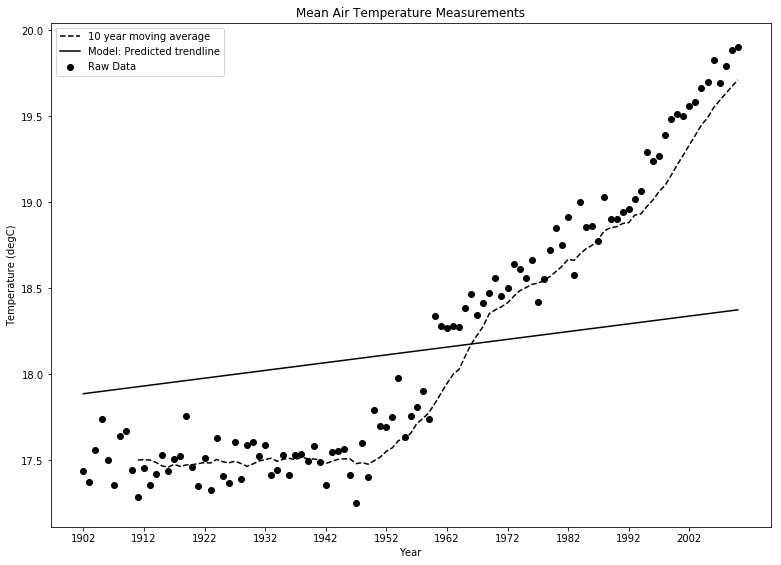

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--', label=f'{window} year moving average');
ax.plot(x, trend_y, c='k', label='Model: Predicted trendline')


ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();